In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
from scipy.stats import ttest_1samp, ttest_ind,ttest_rel
from scipy.stats import chisquare,chi2,chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import levene,kruskal
from statsmodels.graphics.gofplots import qqplot

In [84]:
df=pd.read_csv("Bank-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


**Exploratory Data analysis**

In [85]:
df.shape

(10000, 18)

In [86]:
df.size

180000

In [87]:
df.ndim

2

## Basic Metrics


In [88]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000




*   50% of the customers appear to be from France
*   55% of the customers appear to be male
* Out of the 4 unique types of cards, Diamond seems to be the most popular with 25% of the customers



In [89]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [90]:
df.describe(include='object')

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [91]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

# Null

In [92]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

- There is no null in this data

# Non Graphical Analysis

#### Duplicate

In [93]:
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

- There is no duplilcate value

In [94]:
#creating dataframes for those who have exited and current customers

df_exited=df[(df['Exited'] == 1)]
df_stayed=df[(df['Exited'] == 0)]

In [95]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [96]:
df.rename(columns={'Exited':"churned"},inplace=True)
df['churned'].replace({0:"No",1:"Yes"},inplace=True)


In [97]:
# for numeric calculation
df_num=df.copy()
df_num['churned'].replace({"No":0,"Yes":1},inplace=True)
df_num.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [98]:
df2=df[['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','churned','Complain','Satisfaction Score','Card Type']]

for col in df2.columns:
    print("Value counts for column", col)
    print(df[col].value_counts().head())
    print()
    print()

Value counts for column Geography
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


Value counts for column Gender
Gender
Male      5457
Female    4543
Name: count, dtype: int64


Value counts for column NumOfProducts
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


Value counts for column HasCrCard
HasCrCard
1    7055
0    2945
Name: count, dtype: int64


Value counts for column IsActiveMember
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64


Value counts for column churned
churned
No     7962
Yes    2038
Name: count, dtype: int64


Value counts for column Complain
Complain
0    7956
1    2044
Name: count, dtype: int64


Value counts for column Satisfaction Score
Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64


Value counts for column Card Type
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64




# **Graphical Analysis**

## Univariate Analysis

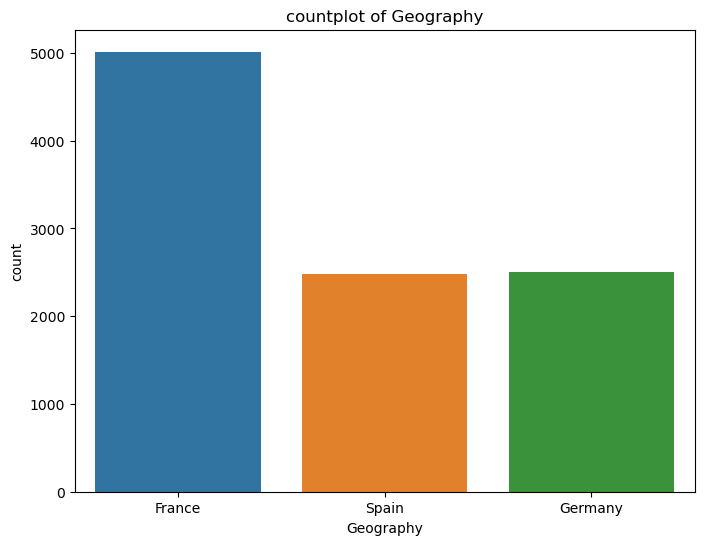

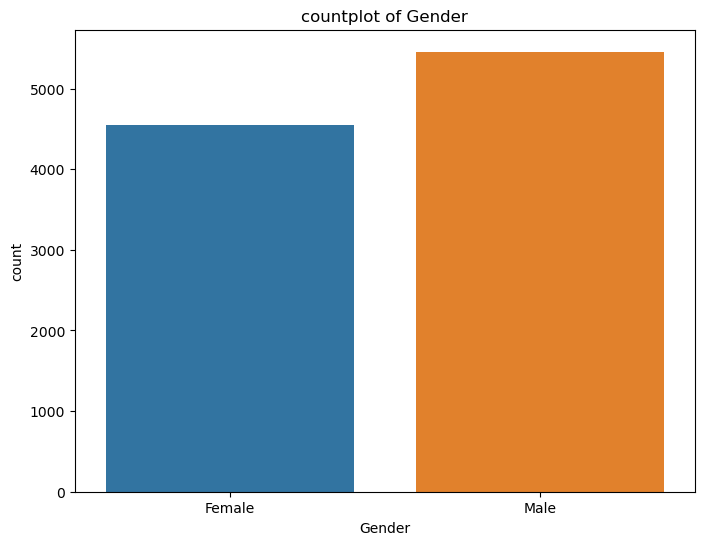

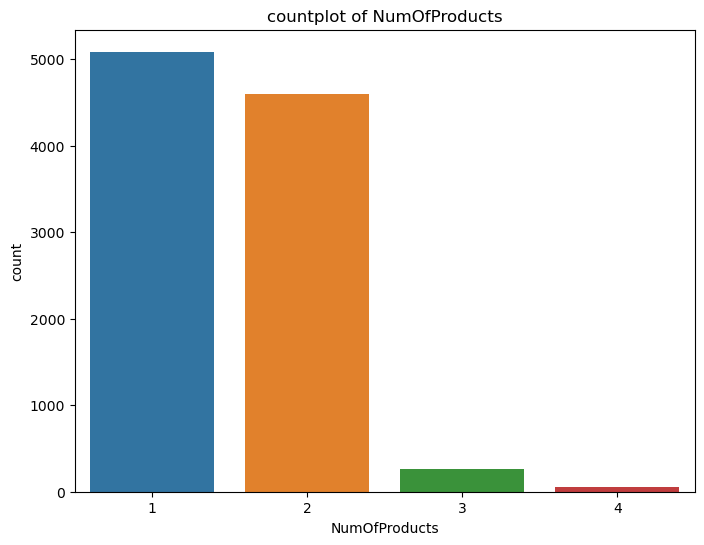

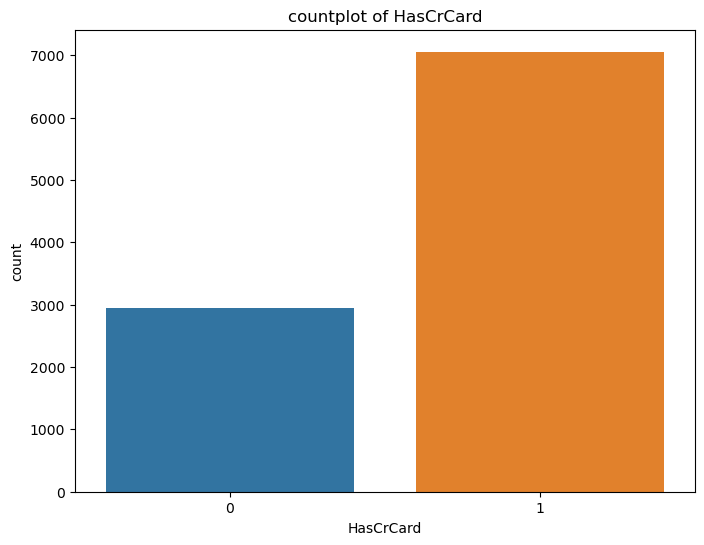

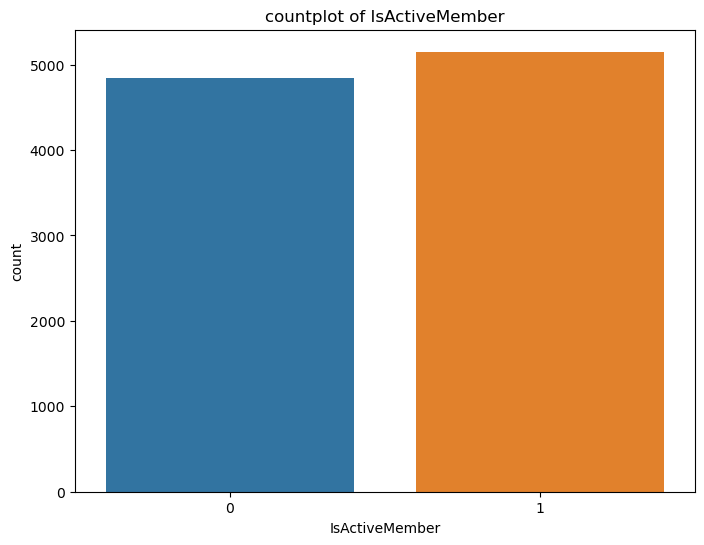

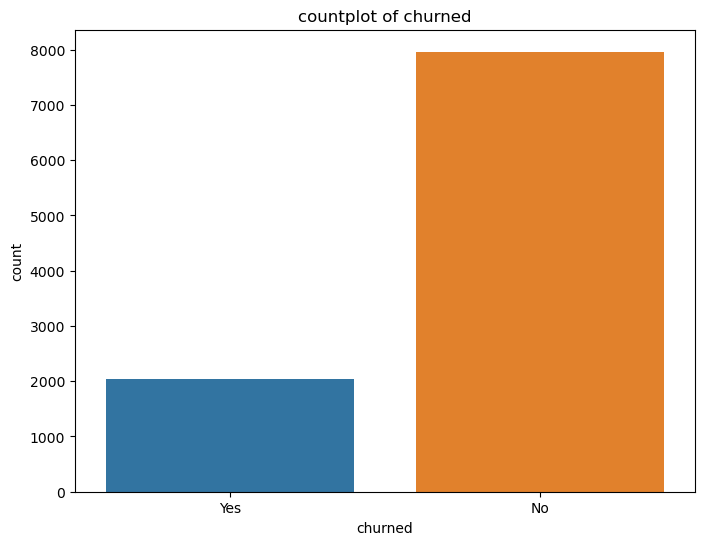

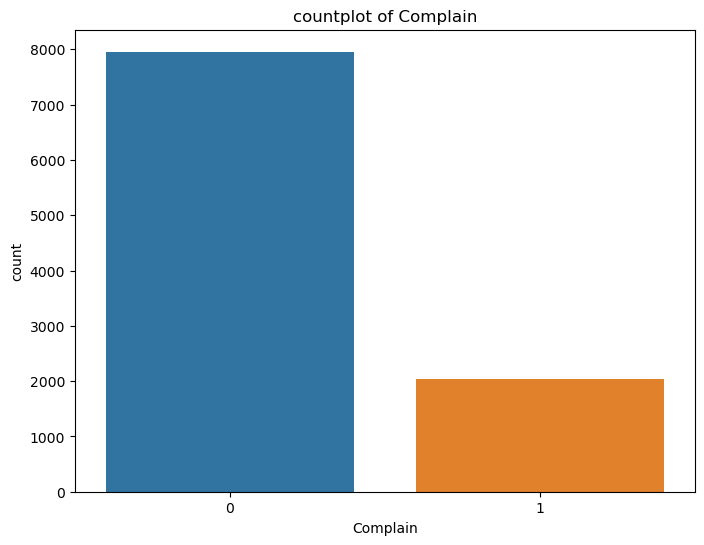

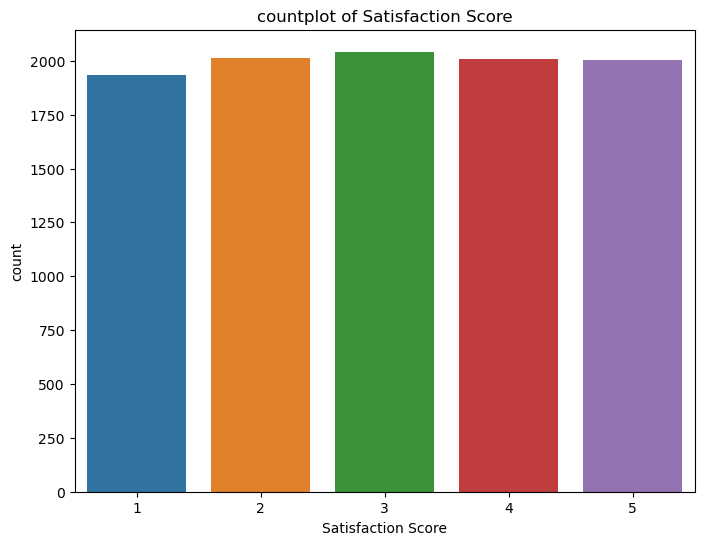

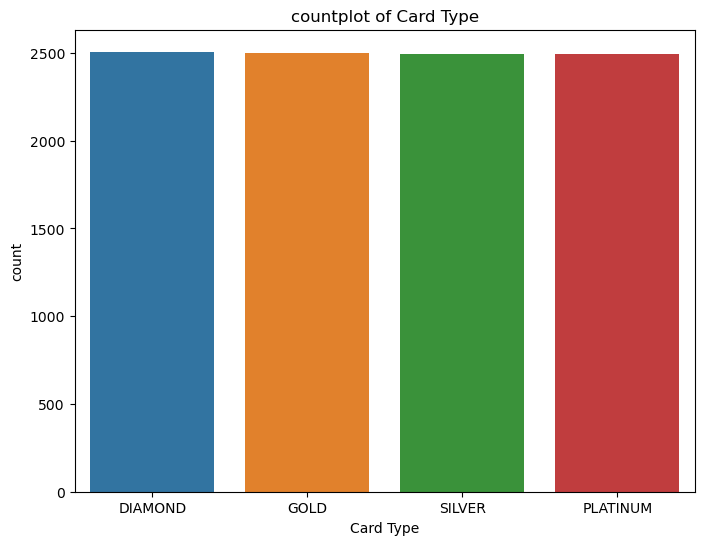

In [99]:
df2=df[['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','churned','Complain','Satisfaction Score','Card Type']]

for col in df2.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df,x=col)
    plt.title(f"countplot of {col}")
    plt.show()

#### Customer Distribution:
- Spain and Germany have the same number of customers.
- France has double the number of customers compared to Spain and Germany.

#### Gender Distribution:
- Male customers are more than female customers.

#### Product Purchase Behavior:
- Customers frequently purchase one or two products, which is more common than purchasing three or four products.

#### Customer Complaints:
- The majority of customers have not complained about the bank.

#### Satisfaction Score:
- The satisfaction score is uniformly distributed across a range from 1 to 5.

#### Type of Card Held by Customers:
- The distribution of the type of card held by customers is almost the same across all types.

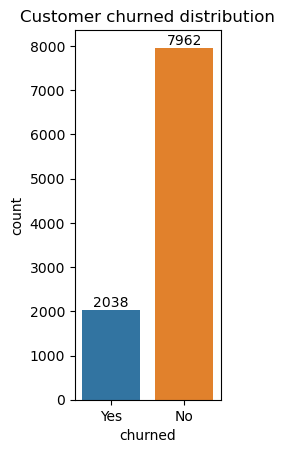

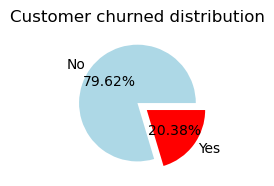

In [100]:
churn_count = df["churned"].value_counts()

plt.subplot(1,3,1)
sns.countplot(data=df,x="churned")
plt.title("Customer churned distribution")
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

plt.subplot(1,3,3)
plt.pie(churn_count,autopct="%.2f%%",labels=churn_count.index,colors=["lightblue", "red"],explode=[0, 0.2])
plt.title("Customer churned distribution")

plt.show()

- Out of 20.38% customer are left the bank

# Bivariate Analysis

# •	Churn by Geography

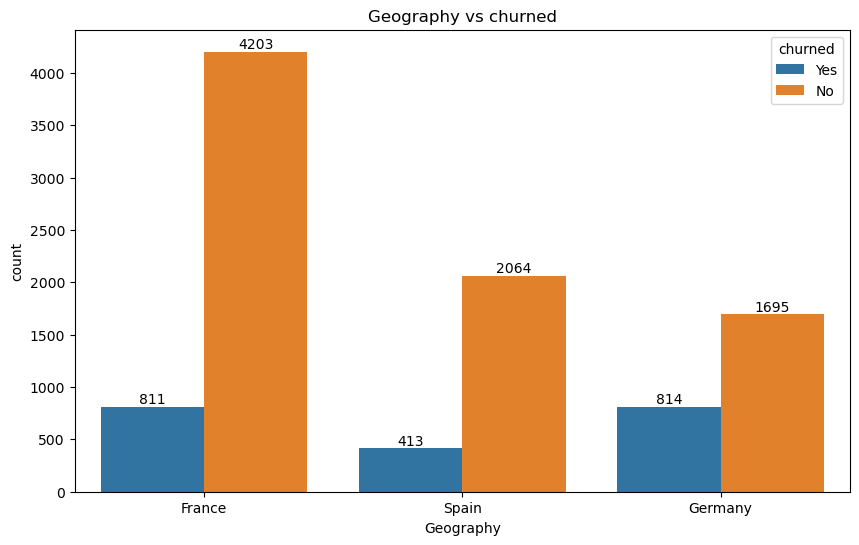

In [101]:
# Geography vs churned
plt.figure(figsize=(10,6))
plt.title("Geography vs churned")
sns.countplot(data=df,x='Geography',hue='churned')
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


### Insights
- France and Germany have a higher churn rate than Spain.
- Compared to France, Spain has half the churn rate.
- The total number of customers in Spain and Germany is nearly the same, but Germany's churn rate is double that of Spain.
### Recommendation 
- Provide timely, effective support and regularly train representatives to handle inquiries and complaints efficiently.

# •	Gender Differences in Churn

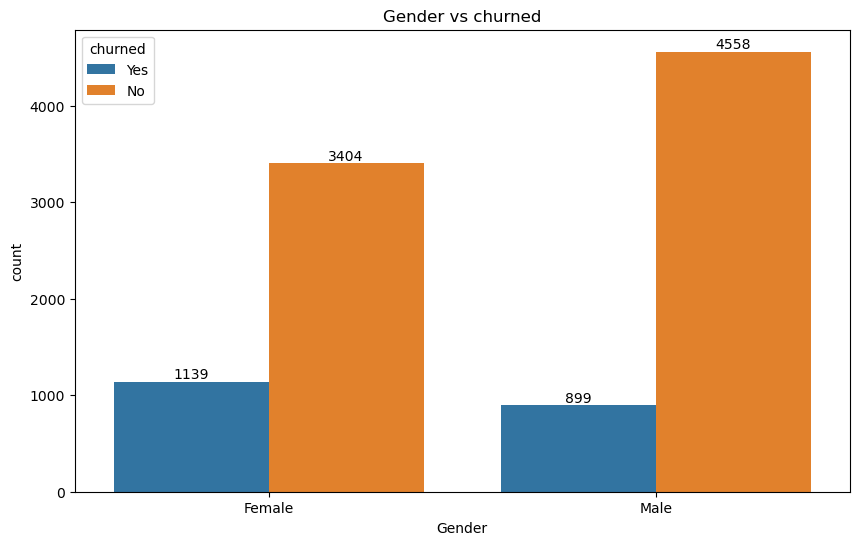

In [102]:
# Gender vs churned
plt.figure(figsize=(10,6))
plt.title("Gender vs churned")
sns.countplot(data=df,x='Gender',hue='churned')
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Insights
- More of the churned customers are female than male. 
- This means that more female customers are leaving the bank compared to male customers.
### Recommendation:
- The bank should focus more on female customers and build strategies to attract and retain them.


# Product and Services Usage



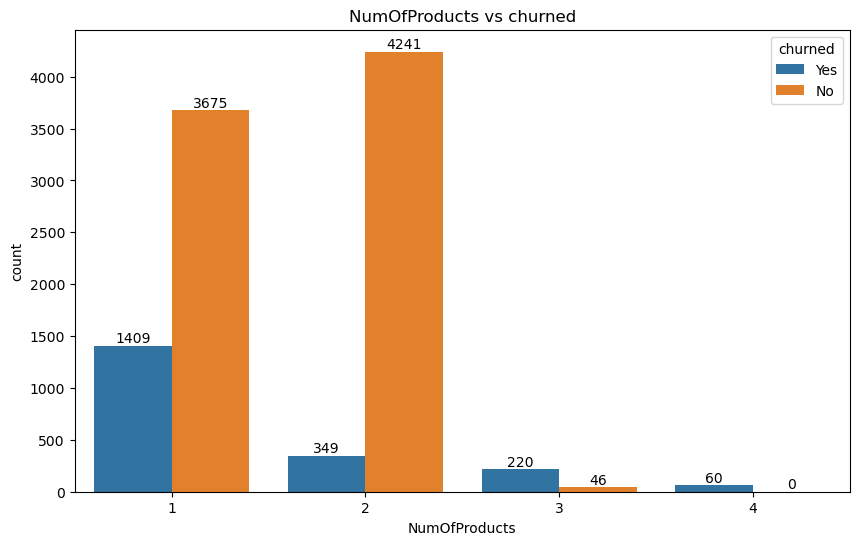

In [103]:
# NumOfProducts vs churned
plt.figure(figsize=(10,6))
plt.title("NumOfProducts vs churned")
sns.countplot(data=df,x='NumOfProducts',hue='churned')
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Insights
- Most customers have either 1 or 2 products.
- Very few customers have more than 2 products.
- The churn rate is very high for customers with 1 product and those with more than 2 products.
- The churn rate is very low for customers with 2 products.

### Recommendation 
- The bank needs a plan to encourage customers to have at least two products.
- They should offer discounts when customers have two or more products.
- If a customer only has one product, the bank should give them a discount to persuade them to buy more.


# Activity Level Analysis

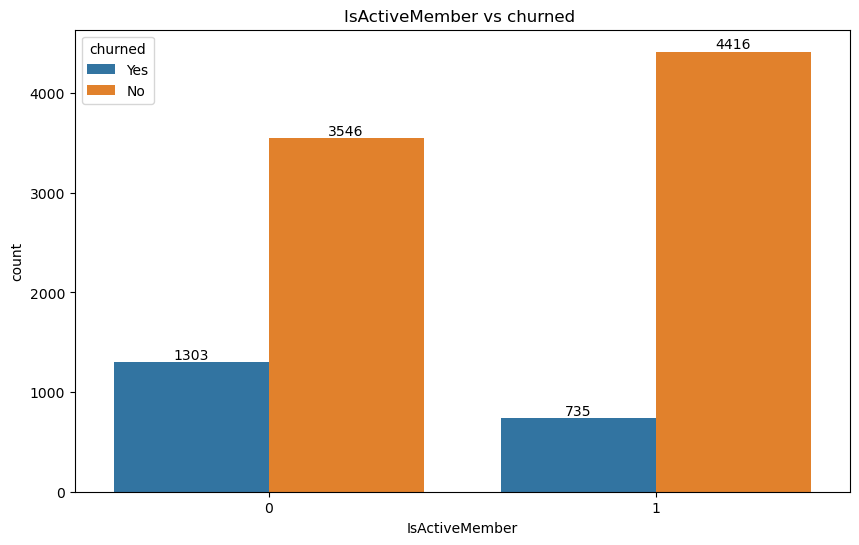

In [104]:
plt.figure(figsize=(10,6))
plt.title("IsActiveMember vs churned ")
sns.countplot(data=df, x='IsActiveMember',hue='churned')
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

### Insights 
- There are good enough number of members who are active and inactive.
- The churn rate for inactive members is nearly twice that of active members.
- Therefore, it's likely that inactive members are more prone to leaving the bank.

### Recommendation 
- The bank should prioritize providing excellent service and engaging with customers to attract their interest and keep them engaged.

# Balance vs. Churn

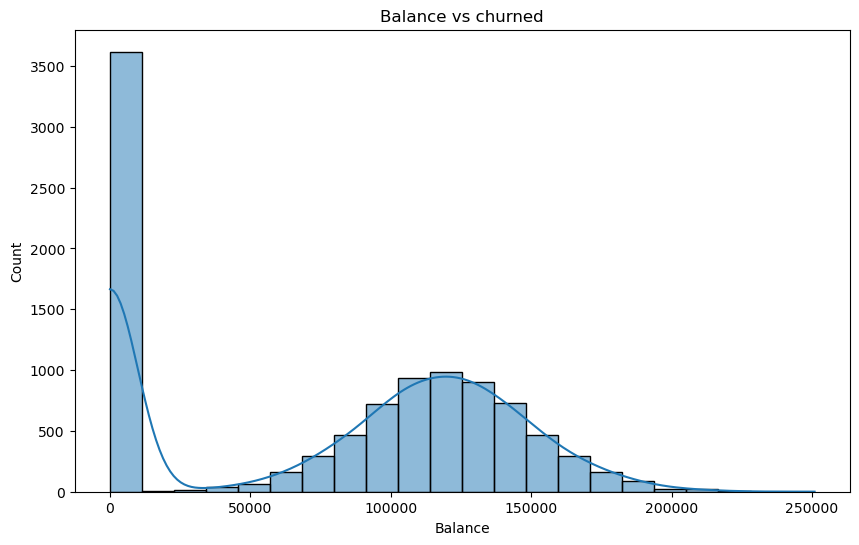

In [105]:
plt.figure(figsize=(10,6))
plt.title("Balance vs churned")
sns.histplot(data=df,x="Balance",kde=True)# 
plt.show()


# Insights
- Over 3000 customers have a zero balance.
- Customers with zero balance are more likely to leave the bank.
- Apart from that, the data follows a normal distribution.

# Credit Card Ownership

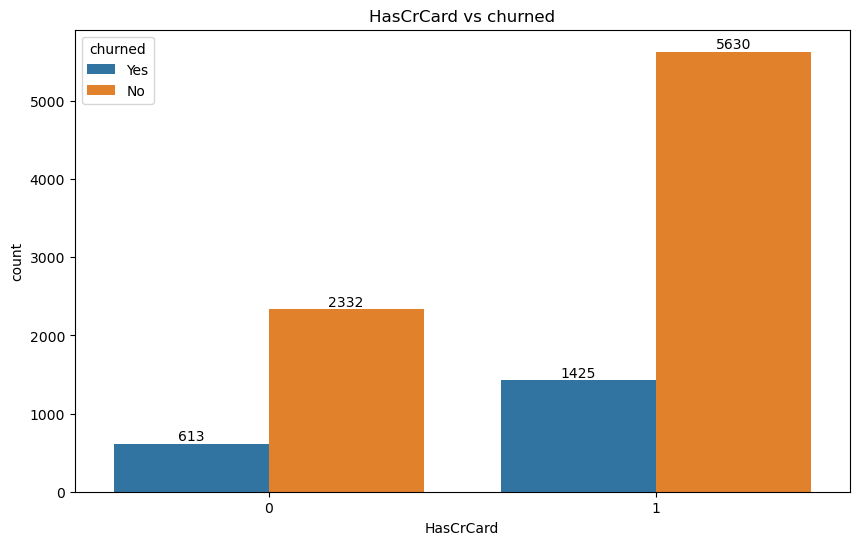

In [106]:
# HasCrCard vs churned
plt.figure(figsize=(10,6))
plt.title("HasCrCard vs churned")
sns.countplot(data=df,x='HasCrCard',hue='churned')
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


# Insights
- Since most customers have cards and there's a 25 percent churn rate for both categories, it seems that having a credit card doesn't significantly affect churn.

# Complaint Analysis

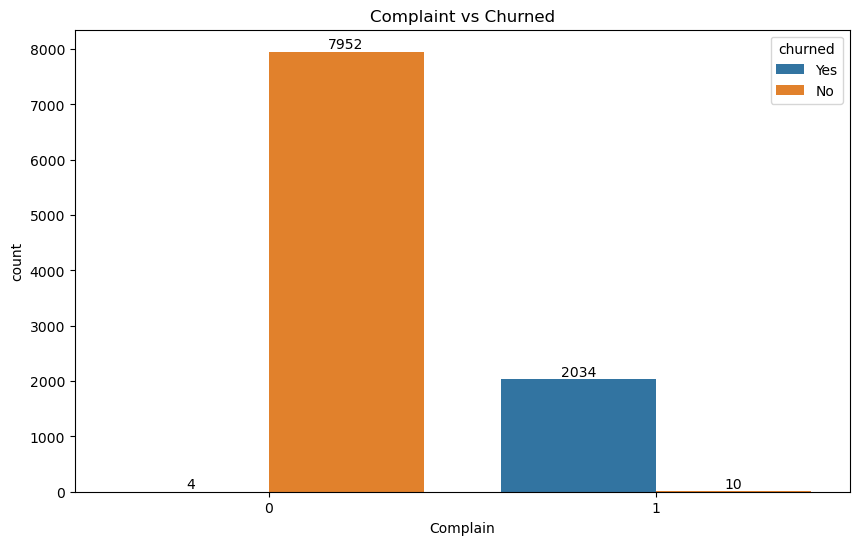

In [107]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Complain',hue='churned')
plt.title("Complaint vs Churned")
ax=plt.gca()

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Insights
- The customer churn rate is high when the number of complaints is high.
- The customer churn rate is low when there are fewer complaints.

### Recommendation 
- The bank should focus more on solving customer problems and queries.

# Satisfaction and Churn

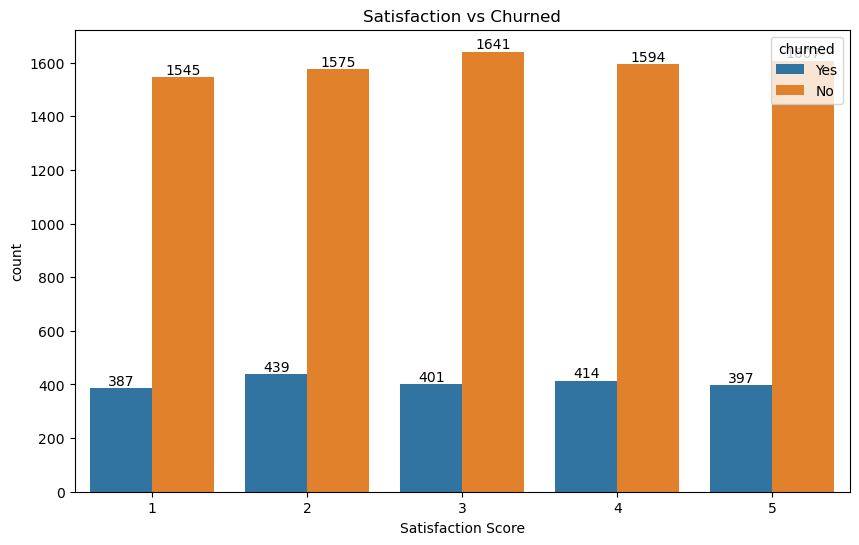

In [108]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Satisfaction Score',hue='churned')
plt.title("Satisfaction vs Churned")
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Insights
- For both categories, the data is uniformly distributed; satisfaction scores do not affect churn.

# Loyalty Points Analysis:

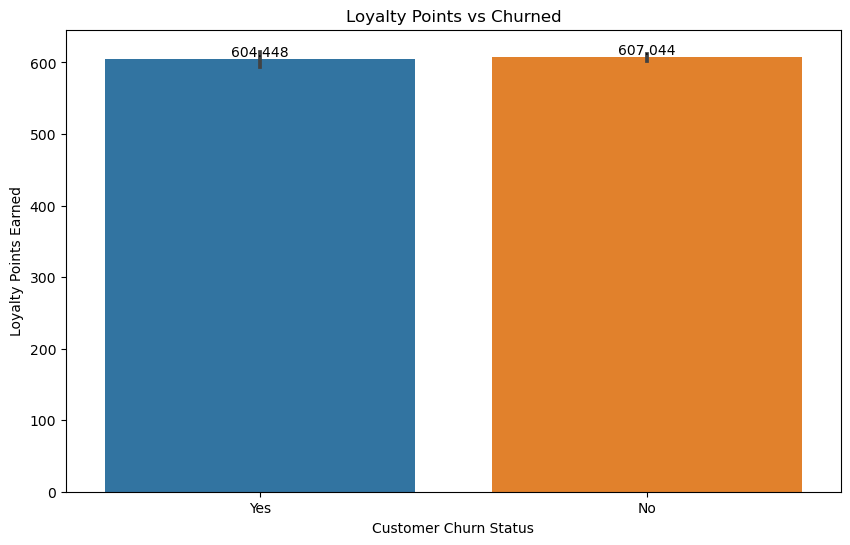

In [109]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,y='Point Earned',x="churned")
plt.title('Loyalty Points vs Churned' )
plt.xlabel('Customer Churn Status')
plt.ylabel('Loyalty Points Earned')
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


### Insight
- The uniform distribution suggests that loyalty points do not significantly affect the churn rate.

# Salary Analysis

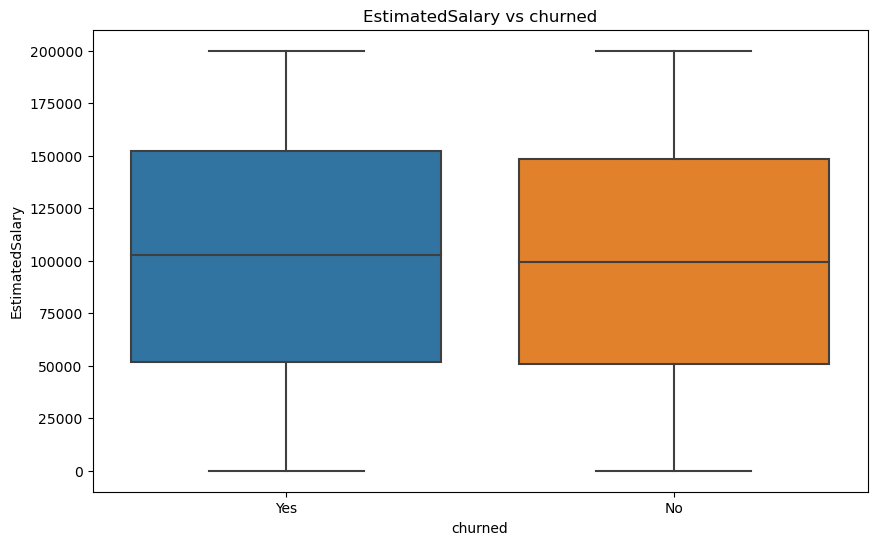

In [110]:
# EstimatedSalary vs churned
plt.figure(figsize=(10,6))
plt.title("EstimatedSalary vs churned")
sns.boxplot(data=df,x='churned',y='EstimatedSalary')
plt.show()

### Note:
- Since both groups have the same median value and similar distributions, we can't draw any significant conclusions.

# Age Analysis

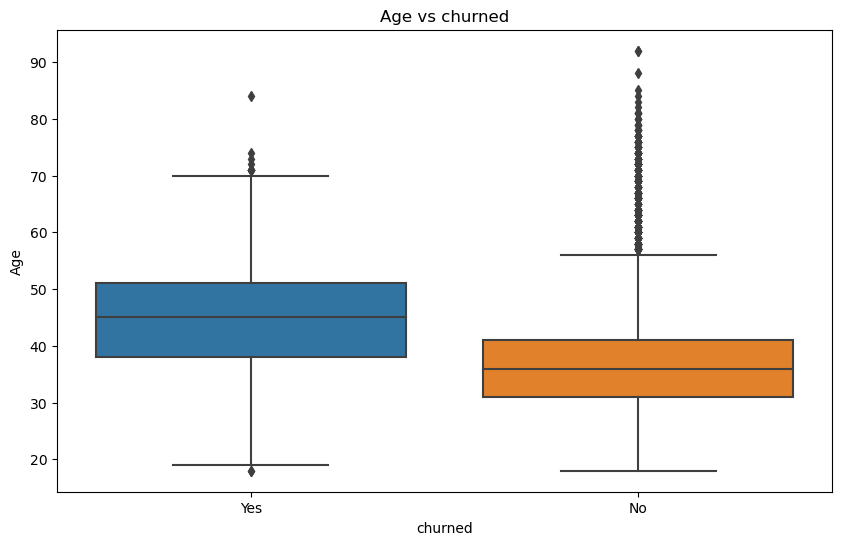

In [111]:
# Age vs churned
plt.figure(figsize=(10,6))
plt.title("Age vs churned")
sns.boxplot(data=df,x='churned',y='Age')
plt.show()


### Insights
-  The churn rate is highest among customers aged between 37 and 44.
### Recommendation 
- The bank should focus more on this age group by offering new FD schemes

# Tenure Analysis

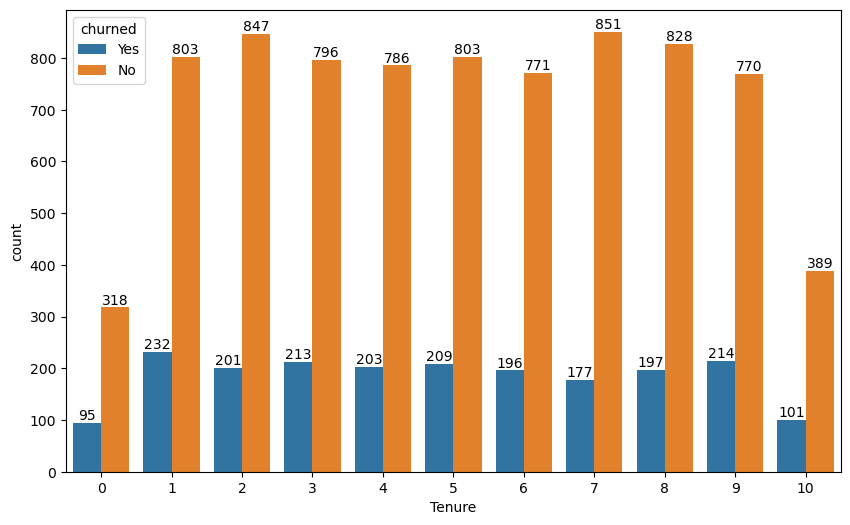

In [112]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Tenure',hue="churned")
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Insight
- There is almost similar  distribution of churn status, we are unable to draw any specific conclusions

# Impact of Card Type on Churn

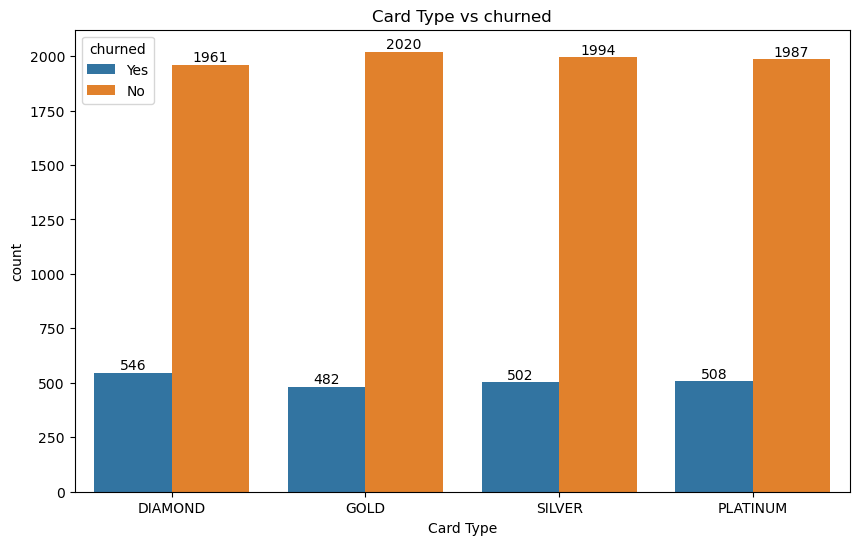

In [113]:
# Card Type  vs churned
plt.figure(figsize=(10,6))
plt.title("Card Type vs churned")
sns.countplot(data=df,x='Card Type',hue='churned')
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Insight
- For all cards have almost same number of customers and same number of churned rate.
- Amongst those that exited, the diamond card seems to be the most popular

 - Average staisfaction score based on card type

In [114]:
#avergae satisfaction score for eaccard type amongst those who left
df_exited.groupby('Card Type')['Satisfaction Score'].mean()

Card Type
DIAMOND     3.012821
GOLD        3.072614
PLATINUM    2.968504
SILVER      2.938247
Name: Satisfaction Score, dtype: float64

In [115]:
#avergae satisfaction score for eaccard type amongst those who left
df_stayed.groupby('Card Type')['Satisfaction Score'].mean()

Card Type
DIAMOND     2.988271
GOLD        3.037624
PLATINUM    3.020634
SILVER      3.024574
Name: Satisfaction Score, dtype: float64

- Number of complaints based on card type

In [116]:
df_exited.groupby('Card Type')['Complain'].mean()

Card Type
DIAMOND     0.998168
GOLD        0.997925
PLATINUM    1.000000
SILVER      0.996016
Name: Complain, dtype: float64

In [117]:
df_exited.groupby(['Card Type','Complain'])['CustomerId'].count()

Card Type  Complain
DIAMOND    0             1
           1           545
GOLD       0             1
           1           481
PLATINUM   1           508
SILVER     0             2
           1           500
Name: CustomerId, dtype: int64

In [118]:
df_stayed.groupby(['Card Type','Complain'])['CustomerId'].count()

Card Type  Complain
DIAMOND    0           1959
           1              2
GOLD       0           2017
           1              3
PLATINUM   0           1984
           1              3
SILVER     0           1992
           1              2
Name: CustomerId, dtype: int64

- % of card types per number of products

In [119]:
df_exited.groupby('NumOfProducts')['Card Type'].value_counts(normalize=True)*100

NumOfProducts  Card Type
1              DIAMOND      26.614620
               SILVER       25.550035
               GOLD         23.988644
               PLATINUM     23.846700
2              DIAMOND      28.080229
               PLATINUM     26.934097
               SILVER       22.922636
               GOLD         22.063037
3              PLATINUM     28.181818
               DIAMOND      26.363636
               SILVER       23.181818
               GOLD         22.272727
4              GOLD         30.000000
               PLATINUM     26.666667
               DIAMOND      25.000000
               SILVER       18.333333
Name: proportion, dtype: float64

In [120]:
df_stayed.groupby(['NumOfProducts'])['Card Type'].value_counts(normalize=True)*100

NumOfProducts  Card Type
1              DIAMOND      25.877551
               GOLD         25.850340
               PLATINUM     24.299320
               SILVER       23.972789
2              SILVER       25.960858
               PLATINUM     25.442113
               GOLD         25.088423
               DIAMOND      23.508606
3              PLATINUM     32.608696
               DIAMOND      28.260870
               SILVER       26.086957
               GOLD         13.043478
Name: proportion, dtype: float64

#  **Correlation between the fields**

#### Heatmap

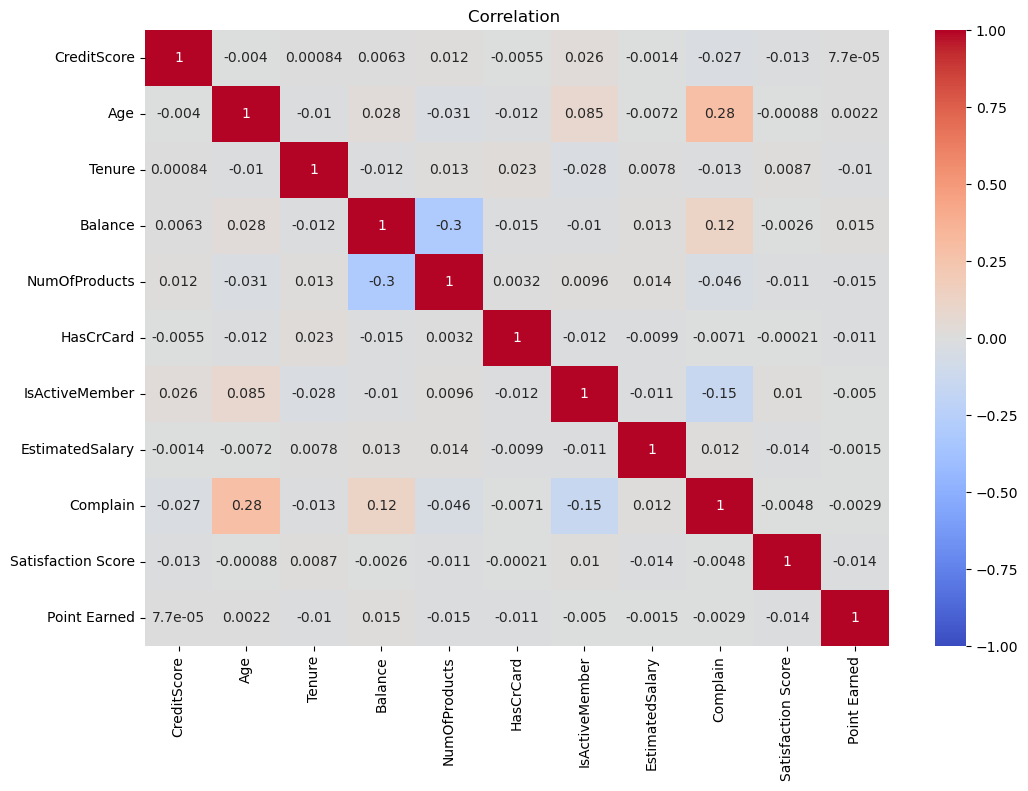

In [121]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation ')
plt.show()

# **Churn rate and the impact on churn**

In [122]:
total_customers = len(df)
customers_left = len(df[df['churned'] =='Yes'])

churn_rate = (customers_left/total_customers)*100

print('Total number of customers:',total_customers)
print('Number of customers who have left:', customers_left)
print('churn rate:',round(churn_rate,2),'%')

Total number of customers: 10000
Number of customers who have left: 2038
churn rate: 20.38 %


In [123]:
# Analyzing the impact of 'Geography'
geography_churn_rate = df_num.groupby('Geography')['churned'].mean() * 100
print("\nChurn Rate by Geography:")
print(geography_churn_rate)

# Analyzing the impact of 'Gender'
gender_churn_rate = df_num.groupby('Gender')['churned'].mean() * 100
print("\nChurn Rate by Gender:")
print(gender_churn_rate)

# Analyzing the impact of 'Tenure'
tenure_churn_rate = df_num.groupby('Tenure')['churned'].mean() * 100
print("\nChurn Rate by Tenure:")
print(tenure_churn_rate)

# Analyzing the impact of 'Satisfaction score'
SS_churn_rate = df_num.groupby('Satisfaction Score')['churned'].mean() * 100
print("\nChurn Rate by Satisfaction Score:")
print(SS_churn_rate)

# Analyzing the impact of 'Complain'
Complain_churn_rate = df_num.groupby('Complain')['churned'].mean() * 100
print("\nChurn Rate by Complain:")
print(Complain_churn_rate)

# Analyzing the impact of 'NumOfProducts'
NumOfProducts_churn_rate = df_num.groupby('NumOfProducts')['churned'].mean() * 100
print("\nChurn Rate by NumOfProducts:")
print(NumOfProducts_churn_rate)

# Analyzing the impact of 'IsActiveMember'
IsActiveMember_churn_rate = df_num.groupby('IsActiveMember')['churned'].mean() * 100
print("\nChurn Rate by IsActiveMember:")
print(IsActiveMember_churn_rate)

# Analyzing the impact of 'HasCrCard'
HasCrCard_churn_rate = df_num.groupby('HasCrCard')['churned'].mean() * 100
print("\nChurn Rate by HasCrCard:")
print(HasCrCard_churn_rate)



Churn Rate by Geography:
Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: churned, dtype: float64

Churn Rate by Gender:
Gender
Female    25.071539
Male      16.474253
Name: churned, dtype: float64

Churn Rate by Tenure:
Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: churned, dtype: float64

Churn Rate by Satisfaction Score:
Satisfaction Score
1    20.031056
2    21.797418
3    19.637610
4    20.617530
5    19.810379
Name: churned, dtype: float64

Churn Rate by Complain:
Complain
0     0.050277
1    99.510763
Name: churned, dtype: float64

Churn Rate by NumOfProducts:
NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: churned, dtype: float64

Churn Rate by IsActiveMember:
IsActiveMember
0    26.871520
1    14.269074
Name: churned, dtype: float64

Churn Rate by HasCrCard:
HasCrCard
0 

#### Insight: 
- It is clear that complaints are not being resolved. 
- 99% of the customers who complained have exited.
- Germany has the highest churn rate and females have a higher churn rate than maales
- Those with 3 or more products have a high perrcentage of churn 80-100% chance

In [124]:
# Analyzing the impact of 'Credit score'
CreditScore_churn_rate = df_num[df_num['churned'] == 1]['CreditScore'].mean()
CreditScore_nonchurn_rate = df_num[df_num['churned'] == 0]['CreditScore'].mean()
print("\nChurned customers for CreditScore:")
print(CreditScore_churn_rate)
print("\nNon Churned customers for CreditScore:")
print(CreditScore_nonchurn_rate)
print('\n')

# Analyzing the impact of 'Age'
Age_churn_rate = df_num[df_num['churned'] == 1]['Age'].mean()
Age_nonchurn_rate = df_num[df_num['churned'] == 0]['Age'].mean()
print("\nChurned customers for Age:")
print(Age_churn_rate)
print("\nNon Churned customers for Age:")
print(Age_nonchurn_rate)
print('\n')

# Analyzing the impact of 'Balance'
Balance_churn_rate = df_num[df_num['churned'] == 1]['Balance'].mean()
Balance_nonchurn_rate = df_num[df_num['churned'] == 0]['Balance'].mean()
print("\nChurned customers for Balance:")
print(Balance_churn_rate)
print("\nNon Churned customers for Balance:")
print(Balance_nonchurn_rate)
print('\n')

# Analyzing the impact of 'EstimatedSalary'
EstimatedSalary_churn_rate = df_num[df_num['churned'] == 1]['EstimatedSalary'].mean()
EstimatedSalary_nonchurn_rate = df_num[df_num['churned'] == 0]['EstimatedSalary'].mean()
print("\nChurned customers for EstimatedSalary:")
print(EstimatedSalary_churn_rate)
print("\nNon Churned customers for EstimatedSalary:")
print(EstimatedSalary_nonchurn_rate)
print('\n')



Churned customers for CreditScore:
645.4146221786065

Non Churned customers for CreditScore:
651.8378548103492



Churned customers for Age:
44.83562315996075

Non Churned customers for Age:
37.40806330067822



Churned customers for Balance:
91109.47600588812

Non Churned customers for Balance:
72742.75066314996



Churned customers for EstimatedSalary:
101509.90878312069

Non Churned customers for EstimatedSalary:
99726.85314117056




# Hypothesis Testing

#### Test 1:

Null Hypothesis (H0): There is no significant difference in satisfaction scores between customers who exited with complaints and those who exited without complaints.

 Alternative Hypothesis (H1): There is a significant difference in satisfaction scores between the two groups.

In [132]:
satisfaction_complaints_contingency_table = pd.crosstab(df[(df['churned'] == 'Yes')]['Satisfaction Score'], df['Complain'])

# Chi-square test
chi2, p, _, _ = chi2_contingency(satisfaction_complaints_contingency_table)

# Print results
print(f'Chi-square value: {chi2}, p-value: {p}')
alpha = 0.05
if p<alpha:
  print("Reject Ho")
else:
  print("Failed to reject Ho")

Chi-square value: 3.195855349283368, p-value: 0.525600639219834
Failed to reject Ho


##### Hence we can conclude that there is no significant difference in satisfaction scores between customers who exited with complaints and those who exited without complaints.

#### Test 2
**Credit Score and Customer Churn (Exited):**


Null Hypothesis (H0): There is no significant difference in the mean credit scores between customers who exited and those who did not.

Alternative Hypothesis (H1): There is a significant difference in the mean credit scores between the two groups.

In [139]:
churned_credit_score=df[df["churned"]=="Yes"]['CreditScore']
non_churned_credit_score=df[df["churned"]=="No"]['CreditScore']

# alpha
alpha=0.5

s,p=ttest_ind(churned_credit_score,non_churned_credit_score,equal_var=False)
print(f't-statistic: {s}, p-value: {p}')
if p<alpha:
  print("Reject Ho")
else:
  print("Failed to reject Ho")

t-statistic: -2.6030372644244175, p-value: 0.009284913465813381
Reject Ho


##### Hence, we can conclude that there is a significant difference in the mean credit scores between the two groups.

#### Test 3
**Geography and Customer Churn (Exited):**


Null Hypothesis (H0): There is no association between the geographical location of a customer and their likelihood of exiting the bank.

Alternative Hypothesis (H1): There is a significant association between the geographical location and customer churn.

In [144]:
geography_contigency_table=pd.crosstab(df['Geography'],df['churned'])
alpha=0.5
s,p,_,_=chi2_contingency(geography_contigency_table)
print(f'Chi-square value: {s}, p-value: {p}')
if p<alpha:
  print("Reject Ho")
else:
  print("Failed to reject Ho")

Chi-square value: 300.6264011211942, p-value: 5.245736109572763e-66
Reject Ho


#####  We can conclude that there is a significant association between the geographical location and customer churn.

#### Test 4:
**Balance and Customer Churn (Exited):**

Null Hypothesis (H0): There is no significant difference in the mean balance between customers who exited and those who did not.

Alternative Hypothesis (H1): There is a significant difference in the mean balance between the two groups.

In [148]:
s, p_valpue = ttest_ind(df[df['churned'] == 'Yes']['Balance'], df[df['churned'] == "No"]['Balance'], equal_var=False)
print(f'T-test results - t-statistic: {s}, p-value: {p}')
alpha = 0.05
if p<alpha:
  print("Reject Ho")
else:
  print("Failed to reject Ho")

T-test results - t-statistic: 12.47802583232175, p-value: 4.399451965599354e-179
Reject Ho


##### Therfore we can conclude that there is a significant difference in the mean balance between the two groups

#### Test 5:
**Complain and Customer Churn (Exited):**

Null Hypothesis (H0): There is no association between customer complaints and customer churn.

Alternative Hypothesis (H1): There is a significant association between customer complaints and customer churn.

In [153]:
complain_contingency_table=pd.crosstab(df['Complain'],df['churned'])
chi,p,_,_=chi2_contingency(complain_contingency_table)
print(f'Chi-square value: {chi}, p-value: {p}')
alpha = 0.05
if p<alpha:
  print("Reject Ho")
else:
  print("Failed to reject Ho")


Chi-square value: 9907.907035880155, p-value: 0.0
Reject Ho


##### Therefore we can conclude that there is a significant association between customer complaints and customer churn.

#### Test 6;
**Number of Products and Customer Churn (Exited):**


Null Hypothesis (H0): There is no association between the number of products and customer churn.

Alternative Hypothesis (H1): There is a significant association between the number of products and customer churn.

In [154]:
products_contingency_table = pd.crosstab(df['NumOfProducts'], df['churned'])
chi, p, _, _ = chi2_contingency(products_contingency_table)
print(f'Chi-square value: {chi}, p-value: {p}')
alpha = 0.05
if p<alpha:
  print("Reject Ho")
else:
  print("Failed to reject Ho")

Chi-square value: 1501.5048306588592, p-value: 0.0
Reject Ho


##### Therefore we can conclude that there is an association between the number of products and customer churn.

#### Test 7

Null hypothesis (H0) assumes that there is no significant association between card type, geography, and customer churn

Alternative hypothesis (H1) suggests that there is a significant association

In [156]:
card_geography_contingency_table = pd.crosstab([df['Card Type'], df['Geography']], df['churned'])

chi2, p, _, _ = chi2_contingency(card_geography_contingency_table)

print(f'Chi-square value: {chi2}, p-value: {p}')
alpha = 0.05
if p<alpha:
  print("Reject Ho")
else:
  print("Failed to reject Ho")

Chi-square value: 309.10624104321494, p-value: 1.0548068868913242e-59
Reject Ho


##### Therefore we can cocnlude that there is an association between card type, geography, and customer churn,

# Recommendations:
- Encourage customers to maintain at least two banking products to enhance their financial engagement.
- Introduce specialized schemes tailored for senior citizens to incentivize them to retain their banking services.
- Implement rewards and incentive programs, regular communication, and enhanced digital services to foster ongoing customer engagement and satisfaction with banking facilities.





# Tableau
- https://public.tableau.com/app/profile/chetan.parab/viz/CustomerChurn_17169888984830/Dashboard1?publish=yes
- The above link has churn analysis Dashboard